# Principal Component Analysis

## Introduction

In the following, we are going to decompose a matrix using PCA and see an example of dimensionality reduction of the feature space.

Assuming a matrix $\textbf{M}$ of dimensions $I \times J$, computing the PCA can be related to SVD in two steps:
+ Centering the columns of $\textbf{M}$ by removing their means correspondingly. In terms of a scatter plot, the data clouds are then centered at $0$.
+ Compute the SVD of the centered version of $\textbf{M}$.

$$(\textbf{M}-\mu) = \textbf{U} \Sigma \textbf{V}^\top$$

Where:
+ $\mu$ is a $J$-dimensional vector containing the means of the columns of $\textbf{M}$.
+ $\textbf{V} \in \mathbb{R}^{J\times R}$ is the orthogonal right singular matrix whose columns consist an orthonormal basis for the distribution of the data.
+ $\Sigma \in \mathbb{R}^{R\times R}$ is a diagonal matrix whose diagonal consists of the singular values in decreasing order, where each value indicates the magnitude or power of its corresponding basis vector.
+ $\textbf{U} \in \mathbb{R}^{I\times R}$ is the orthogonal left singular matrix whose rows re-represent the samples in the orthonormal basis indicated by $\textbf{V}$.

From here on, we assume that $\textbf{M}$ is already centered, i.e. $\mu = 0_J$.

Interpretation difference between SVD and PCA:
+ Ideally, SVD reveals the rank of a matrix from the origin of the sub-space of features, that is to say since the cloud is not centered at $0$ and the data are studied raw.
+ On the other hand, PCA reveals the rank of a matrix from the perspective of the data clouds themselves since each feature cloud is centered first at the origin by removing its mean. This makes PCA more applicable to test the data from within for the sake of dimensionality reduction of the set of features.
+ It is worth mentioning that the ranks revealed by the SVD and PCA differ only by $1$. If the data are centered or the clouds pass through the origin, $R_{SVD} = R_{PCA}$. Otherwise, $R_{SVD} >= R_{PCA}$.

As for the computations below, the first part performs PCA by following the two steps mentioned above, and the second part uses Scikit's library to compute the PCA. Schikit has a good library for matrix decomposition techniques (Truncated SVD, PCA, NMF, _etc_).

#### References:
+ Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
+ API design for machine learning software: experiences from the scikit-learn project, Buitinck et al., 2013.

---

### The Case of a Matrix with Two Features


First we create a matrix $\textbf{M}$ with $200$ samples (rows) and $2$ features (columns) and look at its scatter plot:

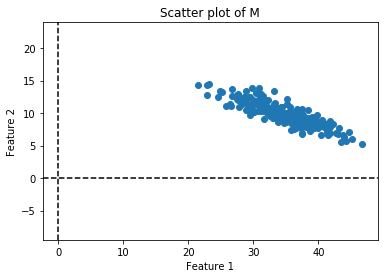

In [3]:
# importing the required module 
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Create the samples in 2-dimensional space
nb_samples = 200
nb_features = 2
m1 = np.zeros((nb_samples,))
m2 = np.zeros((nb_samples,))
m1[0:nb_samples] = np.abs(np.random.normal(30,5, nb_samples))
m2[0:nb_samples] = np.abs(np.random.normal(20,1, nb_samples))

# Put the samples in a matrix of samples and features, and apply rotation of the cloud
M = np.zeros((nb_samples,nb_features))
M[:,0] = m1;
M[:,1] = m2;
#For no rotation, insert angle_rotation=0 (angle_rotation should be in radians)
angle_rotation = np.pi * 0.1
Rotation = np.matrix([[np.cos(angle_rotation), -np.sin(angle_rotation)],
                      [np.sin(angle_rotation), np.cos(angle_rotation)]])
M = np.matrix(M) * np.matrix(Rotation)
M = np.array(M)

# Plot the data cloud in 2D feature space
colors = ("red","green")
plt.scatter(M[:,0], M[:,1])
plt.axvline(x=0, color='k', linestyle='dashed')
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Scatter plot of M')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

After centering the columns of $\textbf{M}$, the scatter plot becomes:

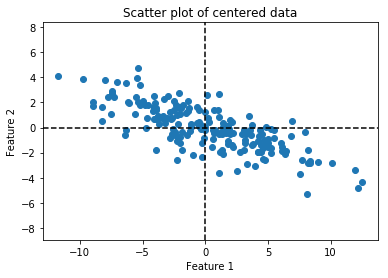

In [2]:
# Calculate mu (the mean vector)
mu = np.transpose( np.repeat( np.array( np.sum(M,axis=0)/nb_samples )[:,np.newaxis],nb_samples,axis=1))
M_c = M - mu

# Plot the centered data cloud in 2D feature space
colors = ("red","green")
plt.scatter(M_c[:,0], M_c[:,1])
plt.axvline(x=0, color='k', linestyle='dashed')
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Scatter plot of centered data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axis('equal')
plt.show()

We notice that the cloud is displaced to be centered at the origin.

Now if we compute the SVD of $\textbf{M}_c$ (the centered version of $\textbf{M}$) and look at the scatter plot with the right singular vectors:

In [4]:
U_c, S_c, V_c = np.linalg.svd(M_c, full_matrices=False)
V_c = np.transpose(V_c)

The singular values of Matrix S_c = 
 [[67.839 0.000]
 [0.000 15.517]]


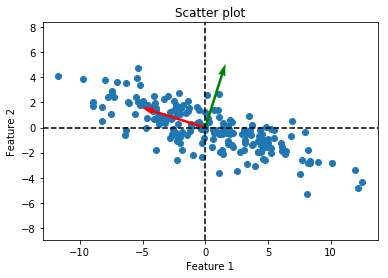

In [5]:
print("The singular values of Matrix S_c = \n",np.diag(S_c))

# Transpose the right singular matrix
V_c_t = np.transpose(V_c)

# Plot the right singular vectors (normalized)
origin = [0], [0] # origin point
colors = ("red","green")
plt.scatter(M_c[:,0], M_c[:,1])
plt.axvline(x=0, color='k', linestyle='dashed')
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Scatter plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.quiver(*origin, V_c_t[:,0], V_c_t[:,1], color=['r','g'], scale=5)
plt.axis('equal')
plt.show()

We can see that the right singular vectors (those of the features) follow the direction of the distribution of the data inside the cloud.

Now, thanks to Scikit's package, one can perform PCA directrly. Here, we can verify some of the values computed above step by step:

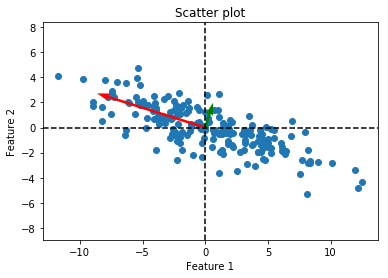

In [6]:
# Calculate the weighted right singular vectors (by the corresponding singular values, or variances)
X = np.matrix(np.diag(S_c)) * np.transpose(np.matrix(V_c))
X = np.array(X)

# Plot the right singular vectors (weighted with the corresponding variance)
origin = [0], [0] # origin point
colors = ("red","green")
plt.scatter(M_c[:,0], M_c[:,1])
plt.axvline(x=0, color='k', linestyle='dashed')
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Scatter plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.quiver(*origin, X[:,0], X[:,1], color=['r','g'], scale=200)
plt.axis('equal')
plt.show()

We notice here that the Red arrow is much larger than the Green one, and this is due to the distribution of the data in the feature space.

---

### The Case of Spectral Feature Reduction of a Hyperspectral Image

Now, we import the hyperspectral image (HSI) of Pavia University, of dimensions $610\times 340\times 103$. As indicated, the image consists of $610*340 = 207400$ pixels and $103$ spectral bands.

We are going to use PCA in order to reduce the dimensionality of the feature space from $103$ to a value $R$. In general, this helps removing some noise and high frequencies in the data, and reducing the dimensionality while retaining the most important information.

The hyperspectral image has dimensions: (610, 340, 103)


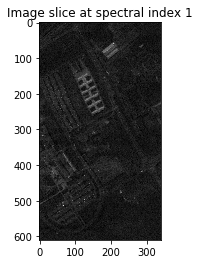

In [7]:
# Load HSI of Pavia University:
from scipy.io import loadmat
D = loadmat("../data/pavia_uni.mat")
D = D['pavia_uni']
dim_D = np.shape(D)
print("The hyperspectral image has dimensions:", dim_D)

# Show slices of images
ind = 1
img_rec = np.array(D)[:,:,ind-1];
imgplot = plt.imshow(img_rec, cmap='gray')
imgplot = plt.title("Image slice at spectral index " + "{:d}".format(ind))

In [8]:
# Reshape the HSI into an image of pixels and spectral bands:
M = np.array( np.reshape(D, (dim_D[0]*dim_D[1],dim_D[2])) )
dim_M = np.shape(M)
print("The reshaped matrix has dimensions:", dim_M)

The reshaped matrix has dimensions: (207400, 103)


Before getting into the PCA computation, it is worth noting that here we use Scikit's package for PCA. It is also possible to specify directly the truncated number of singular values (or components) needed in the final result. The following task might take a couple of seconds to finish:

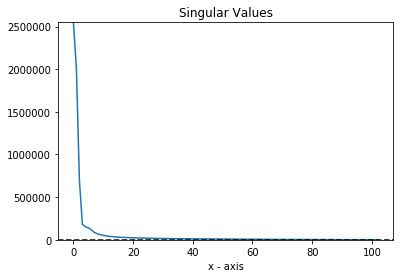

Taking 4 singular values explains 99.16% variance of spectral information.


In [9]:
# Apply PCA to M (using Scikit's PCA package)
import numpy as np
from sklearn.decomposition import PCA

# Specify number of components (use dim_M[1] for all the components)
pca = PCA(n_components = dim_M[1])
# Compute the PCA
pca.fit(M)

# Store the Singular Values
S = pca.singular_values_
# Store the right singular matrix (according to definition)
V = np.transpose(pca.components_)
# Store the explained variance
ExpVar = pca.explained_variance_ratio_

# plot the singular values
plt.plot(S)
plt.xlabel('x - axis')
plt.ylim(-1 , np.max(S)+1)
plt.axhline(y=0, color='k', linestyle='dashed')
plt.title('Singular Values')
plt.show()

# ------------------------

# Number of Singular Values
R = 4

# Contribution to the information (sum of chosen singular values over the total sum)
contribution_sum = np.sum(S[0:R]) / np.sum(S) * 100

# Contribution with respect to Explained Variance (computation)
contribution_expvar = np.sum( np.square(S[0:R]) ) / np.sum( np.square(S) ) * 100

# Contribution with respect to Explained Variance (stored)
contribution_expvar = np.sum(ExpVar[0:R]) * 100

# Print the contribution percentage
print("Taking" , R , "singular values explains " + "{:.2f}".format(contribution_expvar) + "% variance of spectral information.")

Suppose that we choose $R$ singular values, and that matrix $\textbf{V}_R$ corresponds to the result of truncating $\textbf{V}$ by adopting only the first $R$ columns, then the reconstructed matrix, say $\textbf{M}_R = \textbf{M}\textbf{V}_R = \textbf{U}\textbf{S}_R$, becomes of dimensions $207400\times R$, which explains a certain percentage of the information. In other words, this projects the high frequencies from higher dimensionality (in this case, $103$D) to a much lower $R$-D subspace found by PCA with respect to the distribution of samples in the cloud.

Now, let's look at the grayscale images (found in $\textbf{U}\textbf{S}_R$) corresponding to the right singular vectors. This is done by taking a column from $\textbf{U}\textbf{S}_R$ and reshaping it back into image form.

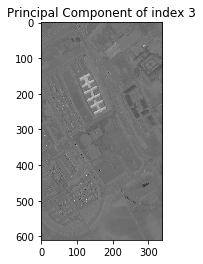

In [10]:
# Reconstruct the data with the chosen number of singular values
R = 103
M_R = np.matrix(M) * np.matrix(V[:,0:R])
M_R = np.array(M_R)

# Take a column index of M_R and reshape it into a grayscale image
col_ind = 3
D_R = np.array( np.reshape(M_R[:,col_ind-1], (dim_D[0],dim_D[1]) ) )

# Print grayscale image
img_rec = D_R;
imgplot = plt.imshow(img_rec, cmap='gray')
imgplot = plt.title("Principal Component of index " + "{:d}".format(col_ind))

Finally, we notice that as the column index equals $6$ and beyond, the image slices become noisy. One may choose a value of $R=4$ for instance and process the data starting with matrix $\textbf{M}_4$.